In [167]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [168]:
fish = pd.read_csv('fish.csv')

In [169]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [170]:
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
fish_input = fish.iloc[:,1:].to_numpy()

In [173]:
fish_target = fish.Species.to_numpy()

In [174]:
train_input , test_input , train_target , test_target = train_test_split(fish_input, fish_target , random_state = 42)

In [175]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [176]:
ss.fit(train_input)

StandardScaler()

In [177]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [178]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)

In [179]:
kn.fit(train_scaled , train_target)
print(kn.score(train_scaled , train_target))
print(kn.score(test_scaled , test_target))

0.8907563025210085
0.85


In [180]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [181]:
proba = kn.predict_proba(test_scaled[:5])

In [182]:
proba

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        , 0.33333333,
        0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        , 0.33333333,
        0.        , 0.        ]])

In [183]:
np.round(proba , 4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [184]:
distance , index = kn.kneighbors(test_scaled[3:4])

In [185]:
train_target[index]

array([['Roach', 'Perch', 'Perch']], dtype=object)

In [186]:
arr = np.array(['A','B','C','D','E'])
boolean = [True , False , True , False , False]
arr[boolean]

array(['A', 'C'], dtype='<U1')

In [187]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [188]:
indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train = train_scaled[indexes]
target = train_target[indexes]

In [189]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train , target)
lr.score(train , target)

1.0

In [190]:
lr.predict(train[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [191]:
print(lr.coef_ , lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [192]:
#z값 계산
decisions = lr.decision_function(train[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [193]:
#시그모이드 함수를 통해 얻어낸 확률값을 추출하는 함수
from scipy.special import expit
expit(decisions)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

In [194]:
# max_iter : 반복횟수 지정 , default 100
# c : alpha값 , default 1 , 조금 완화하기 위해 20

In [195]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 20 , max_iter = 1000)
lr.fit(train_scaled , train_target)

LogisticRegression(C=20, max_iter=1000)

In [196]:
print(lr.score(train_scaled , train_target))
print(lr.score(test_scaled , test_target))

0.9327731092436975
0.925


In [197]:
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [198]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba , 3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [199]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [200]:
print(lr.coef_.shape , lr.intercept_.shape)

(7, 5) (7,)


In [201]:
decisions = lr.decision_function(test_scaled[:5])
decisions

array([[ -6.49809915,   1.03223987,   5.16361871,  -2.72867666,
          3.33888204,   0.32651181,  -0.63447662],
       [-10.85946691,   1.92720519,   4.77098422,  -2.39849654,
          2.9781117 ,   7.84131947,  -4.25965714],
       [ -4.33528575,  -6.23306571,   3.17445546,   6.48669095,
          2.35757575,   2.42117795,  -3.87154865],
       [ -0.68336058,   0.4527268 ,   2.64700136,  -1.18667652,
          3.26453714,  -5.75274607,   1.25851786],
       [ -6.39706503,  -1.99273502,   5.81573609,  -0.11035732,
          3.50283356,  -0.11162211,  -0.70679016]])

In [202]:
from scipy.special import softmax
proba = softmax(decisions , axis = 1)
print(np.round(proba , 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 확인문제
    - 위스콘시 대학의 유방암 진단

In [303]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [304]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [339]:
train_input , test_input , train_target , test_target = train_test_split(cancer.data, cancer.target , stratify = cancer.target , random_state = 42)

In [340]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [341]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [342]:
decisions = lr.decision_function(train_scaled[:,:4])
decisions

array([[  3.27432658,   0.06869667,  -3.34302325],
       [ 12.517853  ,   2.80869888, -15.32655189],
       [  5.78697566,   1.19722839,  -6.98420405],
       ...,
       [ 12.40097604,   2.15125346, -14.55222949],
       [  7.55053309,   1.3781175 ,  -8.92865059],
       [ 19.03956059,   3.6650787 , -22.7046393 ]])

In [343]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled , train_target)

LogisticRegression()

In [344]:
lr.score(train_scaled , train_target)

0.9882629107981221

In [345]:
lr.score(test_scaled , test_target)

0.986013986013986

In [346]:
lr.predict(test_scaled[:5])

array([1, 0, 1, 1, 0])

In [347]:
test_scaled.shape

(143, 30)

In [348]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba , 3)

array([[0.031, 0.969],
       [1.   , 0.   ],
       [0.441, 0.559],
       [0.06 , 0.94 ],
       [0.824, 0.176]])

In [349]:
train_score = []
test_score = []
for i in range(1,30):
    lr = LogisticRegression(C = i)
    lr.fit(train_scaled , train_target)
    train_score.append(lr.score(train_scaled , train_target))
    test_score.append(lr.score(test_scaled , test_target))

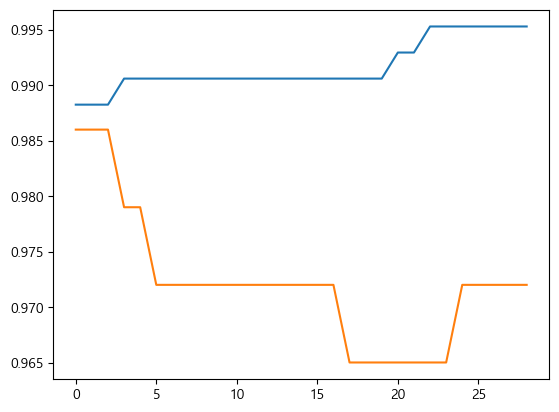

In [350]:
plt.plot(train_score)
plt.plot(test_score)

In [351]:
pd.DataFrame(cancer.data , columns = cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [352]:
cancer.feature_names[:10]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],
      dtype='<U23')

In [353]:
cancer.data[:,:10]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

In [315]:
train_input , test_input , train_target , test_target = train_test_split(cancer.data[:,:10], cancer.target , stratify = cancer.target , random_state = 42)

In [316]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [317]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [318]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 6)
lr.fit(train_scaled , train_target)

LogisticRegression(C=6)

In [319]:
print(lr.score(train_scaled , train_target))
print(lr.score(test_scaled , test_target))

0.9530516431924883
0.9090909090909091


In [320]:
result = lr.predict(test_scaled)
from sklearn.metrics import classification_report
print(classification_report(result , test_target))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        58
           1       0.90      0.95      0.93        85

    accuracy                           0.91       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143



In [321]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled , train_target)

KNeighborsClassifier()

In [322]:
len(train_scaled)

426

In [323]:
train_score = []
test_score = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_scaled , train_target)
    train_score.append(knn.score(train_scaled , train_target))
    test_score.append(knn.score(test_scaled , test_target))

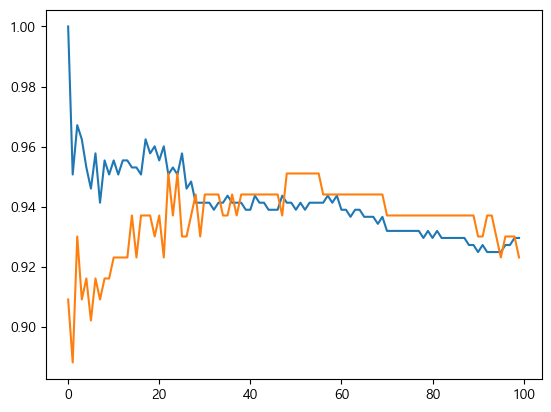

In [324]:
plt.plot(train_score)
plt.plot(test_score)

In [325]:
for i in range(len(train_score)):
    if train_score[i]<test_score[i]:
        print(i)
        break

22


In [326]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 23)
kn.fit(train_scaled , train_target)

KNeighborsClassifier(n_neighbors=23)

In [327]:
print(kn.score(train_scaled , train_target))
print(kn.score(test_scaled , test_target))

0.9507042253521126
0.951048951048951


In [328]:
from sklearn.datasets import load_iris
iris = load_iris()

In [329]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [330]:
train_input , test_input , train_target , test_target = train_test_split(iris.data, iris.target , random_state = 42)

In [331]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_input , train_target)
print(lr.score(train_input , train_target))
print(lr.score(test_input , test_target))

0.9642857142857143
1.0


In [332]:
train_score = []
test_score = []
for i in range(1,30):
    lr = LogisticRegression(C = i)
    lr.fit(train_input , train_target)
    train_score.append(lr.score(train_input , train_target))
    test_score.append(lr.score(test_input , test_target))

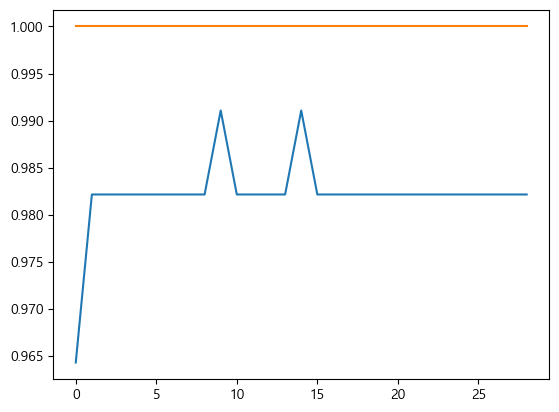

In [333]:
plt.plot(train_score)
plt.plot(test_score)

In [334]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 10)
lr.fit(train_input , train_target)
print(lr.score(train_input , train_target))
print(lr.score(test_input , test_target))

0.9910714285714286
1.0


In [335]:
np.round(lr.predict_proba(train_input) , 3)

array([[0.997, 0.003, 0.   ],
       [0.998, 0.002, 0.   ],
       [0.   , 0.036, 0.964],
       [0.001, 0.961, 0.038],
       [0.   , 0.962, 0.038],
       [0.998, 0.002, 0.   ],
       [0.994, 0.006, 0.   ],
       [0.004, 0.995, 0.001],
       [0.   , 0.496, 0.504],
       [0.   , 0.054, 0.946],
       [0.   , 0.992, 0.007],
       [0.   , 0.001, 0.999],
       [0.001, 0.991, 0.008],
       [0.   , 0.   , 1.   ],
       [0.001, 0.908, 0.092],
       [0.996, 0.004, 0.   ],
       [0.   , 0.   , 1.   ],
       [0.001, 0.998, 0.001],
       [0.994, 0.006, 0.   ],
       [0.998, 0.002, 0.   ],
       [0.986, 0.014, 0.   ],
       [0.008, 0.991, 0.001],
       [0.   , 0.275, 0.725],
       [0.979, 0.021, 0.   ],
       [0.98 , 0.02 , 0.   ],
       [0.983, 0.017, 0.   ],
       [0.001, 0.985, 0.014],
       [0.993, 0.007, 0.   ],
       [0.002, 0.995, 0.004],
       [0.   , 0.001, 0.999],
       [0.996, 0.004, 0.   ],
       [0.001, 0.993, 0.006],
       [0.   , 0.019, 0.981],
       [0.

In [336]:
decisions = lr.decision_function(train_input)
decisions

array([[ 12.30534073,   6.49706033, -18.80240106],
       [ 13.01663648,   6.89327622, -19.9099127 ],
       [ -7.89444059,   2.30269426,   5.59174633],
       [ -3.57225913,   3.40023233,   0.1720268 ],
       [ -5.07740319,   4.15170857,   0.92569462],
       [ 12.82031872,   6.55558949, -19.37590821],
       [ 11.95354448,   6.84701483, -18.80055931],
       [ -1.09875917,   4.33362381,  -3.23486465],
       [ -7.16806645,   3.57625482,   3.59181163],
       [ -8.75562338,   2.94667037,   5.80895301],
       [ -3.84484923,   4.36656271,  -0.52171348],
       [-11.71768411,   2.13449051,   9.58319361],
       [ -2.72431581,   3.77819383,  -1.05387802],
       [-14.41227508,   3.03730925,  11.37496583],
       [ -4.06001417,   3.17599955,   0.88401463],
       [ 12.06535383,   6.58233002, -18.64768385],
       [-15.0856491 ,   3.26829161,  11.81735749],
       [ -2.22926363,   4.48499912,  -2.2557355 ],
       [ 11.82536693,   6.66759971, -18.49296664],
       [ 12.33256368,   6.33135

In [337]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_input , train_target)
print(kn.score(train_input , train_target))
print(kn.score(test_input , test_target))

0.9464285714285714
1.0


In [338]:
train_score = []
test_score = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_input , train_target)
    train_score.append(knn.score(train_input , train_target))
    test_score.append(knn.score(test_input , test_target))

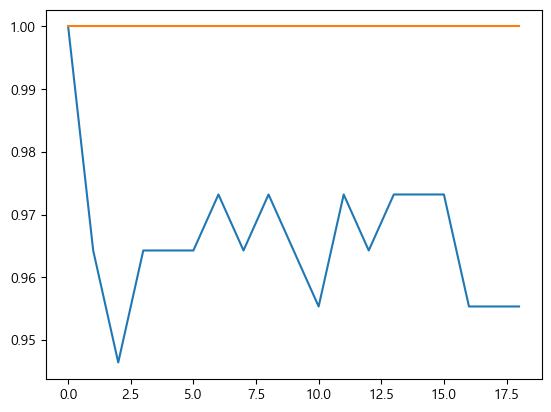

In [244]:
plt.plot(train_score)
plt.plot(test_score)

In [245]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 7)
kn.fit(train_input , train_target)
print(kn.score(train_input , train_target))
print(kn.score(test_input , test_target))

0.9732142857142857
1.0


In [246]:
result = kn.predict(test_input)
from sklearn.metrics import classification_report
print(classification_report(result , test_target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [247]:
iris.target_names[result]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype='<U10')

In [355]:
pred = lr.predict(test_scaled)

# 혼동 행렬

## 정확도(Accuracy)

- 전체 샘플 중 맞게 예측한 샘플 수의 비융
- accuracy_score(y_true, y_pred)


- 정확도(Accuracy) = $\frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수}$

## 오차행렬(Confusion Matrix) or 혼돈 행렬

- 이진분류의 성능지표를 잘 활용된다.
- 이진분류의 예측 오류가 얼마인지 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타낸다.
- Negative : 0, Positive : 1
- TN : 예측값과 실제값이 모두 Negative 0으로 예측
- FP : 예측은 Positive 1인데 실제값은 Negative 0
- FN : 예측은 Negative 0인데 실제값은 Positive 1
- TP : 예측과 실제값 모두 Positive 1로 예측
- confusion_matrix(y_true, y_pred)

## 정밀도(Precision)

- 예측과 실제값이 Positive로 일치하는 데이터의 비율
- 높을수록 좋은 모델이다.
- 불균형한 데이터셋을 다룰 때 유용한 지표
- precision_score(y_true, y_pred)


- 정밀도(Precision) = $\frac{TP}{TP + FP}$

## 재현율(Recall)

- 실제값이 Positive인 대상 중 예측과 실제값이 Positive로 일치한 데이터의 비율
- 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 부름
- recall_score(y_true, y_pred)


- 재현율(Recall) = $\frac{TP}{TP + FN}$

## 특이도(Specificity) 

- 실제값 Negative를 Negative로 예측한 비율


- 특이도(Specificity)  = $\frac{TN}{FP + TN}$

## F1 스코어

- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.
- f1_score(y_true, y_pred)


- F1 = $2 * \frac{precision * recall}{precision + recall}$

## ROC/AUC curve 곡선

- ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선(FPR을 x축, TPR=재현율을 y축)
- AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로 일반적으로 1에 가까울수록 좋은 수치이다.

## 기타 평가 지표

- classfication_report(y_true, y_pred)

In [356]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , roc_auc_score , f1_score , confusion_matrix , roc_curve , precision_recall_curve

In [359]:
cm = confusion_matrix(test_target , pred)
cm

array([[50,  3],
       [ 1, 89]], dtype=int64)

In [380]:
pred_proba = lr.predict_proba(test_scaled)[: , 1].reshape(-1,1)

In [381]:
def get(real , pred = None , pred_proba = None):
    confusion = confusion_matrix(real , pred)
    accuracy = accuracy_score(real , pred)
    precision = precision_score(real , pred)
    recall = recall_score(real , pred)
    f1 = f1_score(real , pred)
    roc_auc = roc_auc_score(real , pred_proba)
    print('혼동 행렬\n {}'.format(confusion))
    print(accuracy)
    print()
    print(f'정확도 : {accuracy:.4f} , 정밀도 : {precision:.4f} , 재현율 : {recall:.4f} , f1 스코어 : {f1:.4f} , roc곡선 : {roc_auc:.4f}')

In [382]:
get(test_target , pred , pred_proba)

혼동 행렬
 [[50  3]
 [ 1 89]]
0.972027972027972

정확도 : 0.9720 , 정밀도 : 0.9674 , 재현율 : 0.9889 , f1 스코어 : 0.9780 , roc곡선 : 0.9897


In [374]:
pred_proba

array([[9.98963179e-01],
       [1.21244256e-07],
       [9.07169736e-01],
       [9.99012973e-01],
       [3.35492692e-02],
       [1.32678637e-12],
       [4.34204587e-06],
       [2.89041950e-07],
       [9.23631750e-06],
       [9.99997148e-01],
       [4.01258795e-01],
       [9.99999918e-01],
       [3.64479523e-11],
       [3.66660477e-12],
       [9.98611180e-01],
       [9.99999075e-01],
       [2.82275710e-11],
       [2.79703728e-02],
       [7.26899909e-01],
       [9.96874089e-01],
       [2.05754284e-11],
       [4.21225993e-06],
       [9.99590830e-01],
       [9.99998434e-01],
       [9.99999929e-01],
       [9.98602304e-01],
       [9.99999951e-01],
       [9.99551287e-01],
       [9.99060061e-01],
       [2.07429025e-13],
       [9.99993191e-01],
       [9.99663265e-01],
       [8.67012039e-01],
       [9.99995182e-01],
       [9.99999851e-01],
       [9.99998870e-01],
       [9.99991582e-01],
       [9.99894671e-01],
       [1.90473313e-22],
       [1.00000000e+00],


### 정밀도와 재현율 시각화

In [415]:
def prc(real , pred):
    precisions , recalls , thresholds = precision_recall_curve(real , pred)
    
    plt.figure(figsize = (10,10))
    boundary = thresholds.shape[0]
    plt.plot(thresholds , precisions[0:boundary] , ls= '--' , label = 'precision')
    plt.plot(thresholds , recalls[0:boundary] , label = 'recall')
    start , end = plt.xlim()
    plt.xticks(np.round(np.arange(start , end , 0.1) , 2))
    plt.ylim(0.6 , 1.0)
    plt.xlabel('threshold value')
    plt.ylabel('precision and recall')
    plt.legend(loc = 'lower center')
    plt.grid()
    plt.show()

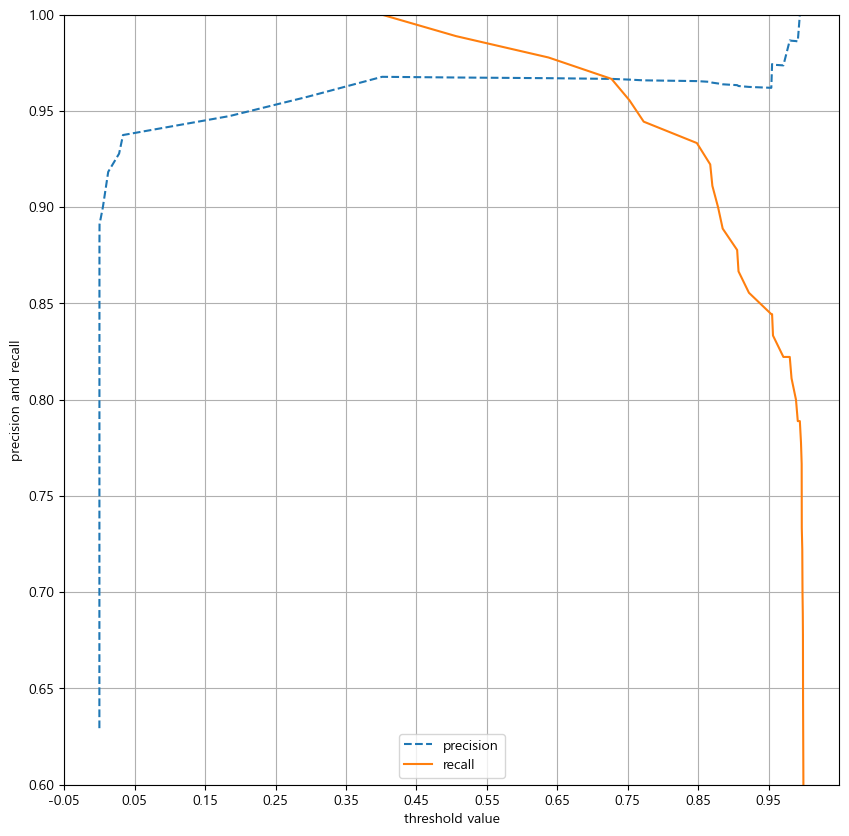

In [416]:
prc(test_target , pred_proba)

In [418]:
pred_proba

array([[9.98963179e-01],
       [1.21244256e-07],
       [9.07169736e-01],
       [9.99012973e-01],
       [3.35492692e-02],
       [1.32678637e-12],
       [4.34204587e-06],
       [2.89041950e-07],
       [9.23631750e-06],
       [9.99997148e-01],
       [4.01258795e-01],
       [9.99999918e-01],
       [3.64479523e-11],
       [3.66660477e-12],
       [9.98611180e-01],
       [9.99999075e-01],
       [2.82275710e-11],
       [2.79703728e-02],
       [7.26899909e-01],
       [9.96874089e-01],
       [2.05754284e-11],
       [4.21225993e-06],
       [9.99590830e-01],
       [9.99998434e-01],
       [9.99999929e-01],
       [9.98602304e-01],
       [9.99999951e-01],
       [9.99551287e-01],
       [9.99060061e-01],
       [2.07429025e-13],
       [9.99993191e-01],
       [9.99663265e-01],
       [8.67012039e-01],
       [9.99995182e-01],
       [9.99999851e-01],
       [9.99998870e-01],
       [9.99991582e-01],
       [9.99894671e-01],
       [1.90473313e-22],
       [1.00000000e+00],


In [421]:
test_target

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [422]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [420]:
cut_off = [0.6 , 0.65 , 0.7 , 0.75 , 0.8]

for i in cut_off:
    #확률값이 cut보다 크면 1 , 아니면 0
    y_pred = np.where(pred_proba.reshape(-1)>i , 1 , 0)
    acc = accuracy_score(test_target , y_pred)
    recall = recall_score(test_target , y_pred)
    precision = precision_score(test_target , y_pred)
    print(f'임계값 : {i}')
    print(f'정확도 : {acc:.2f}\n정밀도 : {precision:.2f}\n재현율 : {recall:.2f}')
    print()
    print()

임계값 : 0.6
정확도 : 0.97
정밀도 : 0.97
재현율 : 0.98


임계값 : 0.65
정확도 : 0.96
정밀도 : 0.97
재현율 : 0.97


임계값 : 0.7
정확도 : 0.96
정밀도 : 0.97
재현율 : 0.97


임계값 : 0.75
정확도 : 0.95
정밀도 : 0.97
재현율 : 0.96


임계값 : 0.8
정확도 : 0.94
정밀도 : 0.97
재현율 : 0.93


